## Importing Essential Libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Loading the dataset

#### Source 1

In [12]:
emp_data = pd.read_csv('./Data/Employee_Churn_Prediction/EmployeeData.csv')
emp_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


#### Source 2

In [13]:
emp_sat_data = pd.read_excel('./Data/Employee_Churn_Prediction/employee_satisfaction_data.xlsx')
emp_sat_data.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [14]:
print(len(emp_data), len(emp_sat_data))

14999 14999


In [15]:
emp_data.employee_id.nunique()

14999

In [16]:
emp_sat_data['EMPLOYEE #'].nunique()

14999

## Merging the data

In [98]:
data = pd.merge(emp_data, emp_sat_data, left_on=['employee_id'], right_on=['EMPLOYEE #'], how='inner').drop(columns='EMPLOYEE #')
data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


## Missing Data

In [99]:
data.isna().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

c:\users\oorja\anaconda3\envs\deeplearningvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

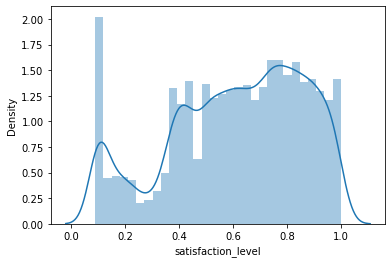

In [100]:
# distribution plot of satisfaction_level
sns.distplot(data['satisfaction_level'])

# V/S

c:\users\oorja\anaconda3\envs\deeplearningvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

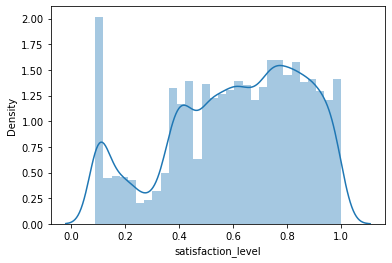

In [101]:
# satisfaction_level column with mean imputation
sns.distplot(data['satisfaction_level'].fillna(data['satisfaction_level'].mean()))

c:\users\oorja\anaconda3\envs\deeplearningvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

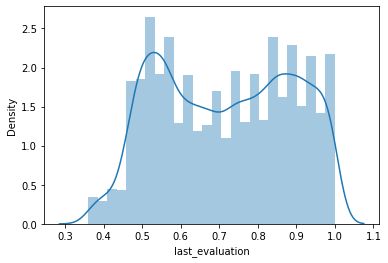

In [102]:
# distribution plot of last_evaluation
sns.distplot(data['last_evaluation'])

# V/S

c:\users\oorja\anaconda3\envs\deeplearningvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

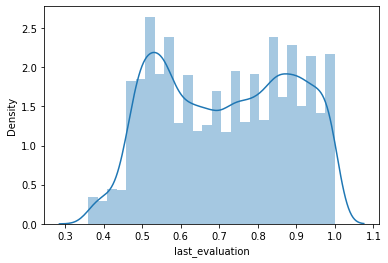

In [103]:
# last_evaluation column with mean imputation
sns.distplot(data['last_evaluation'].fillna(data['last_evaluation'].mean()))

#### Inference: Since the distribution plots for both satisfaction_level and last_evaluation remains similar before and after impututaion, so let's impute the columns with their respective means

In [104]:
data['satisfaction_level'] = data['satisfaction_level'].fillna(data['satisfaction_level'].mean())
data['last_evaluation'] = data['last_evaluation'].fillna(data['last_evaluation'].mean())

In [105]:
data.isna().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [25]:
data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


## Exporlatory Data Analysis

### Correlation HeatMap

<AxesSubplot:>

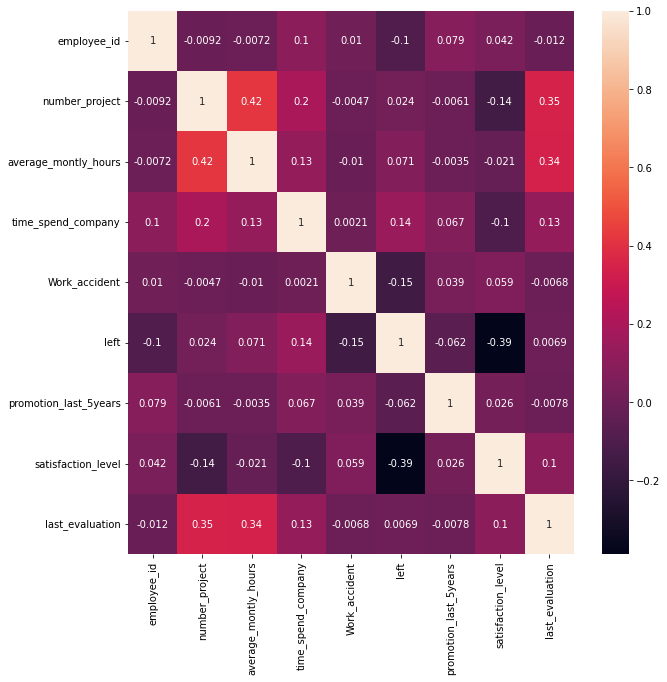

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

#### Inference: Not much correlation among features

## Violin Plot

c:\users\oorja\anaconda3\envs\deeplearningvenv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


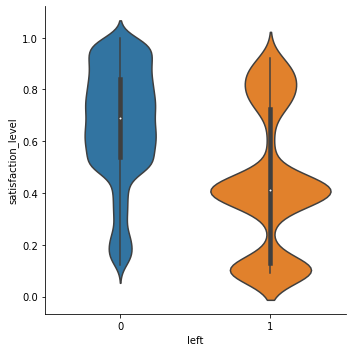

In [116]:
sns.factorplot(x='left', y='satisfaction_level', data=data, kind='violin')

#### Inference: People with high satisfaction level tend to stay and not churn

c:\users\oorja\anaconda3\envs\deeplearningvenv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


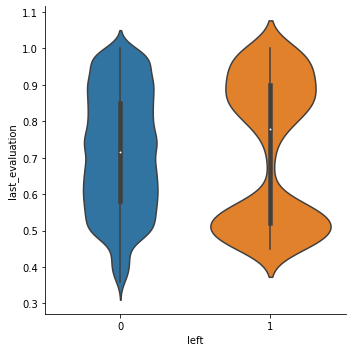

In [130]:
sns.factorplot(x='left', y='last_evaluation', data=data, kind='violin')

#### Inference: Nothing can be deduced for last_evaluation

c:\users\oorja\anaconda3\envs\deeplearningvenv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


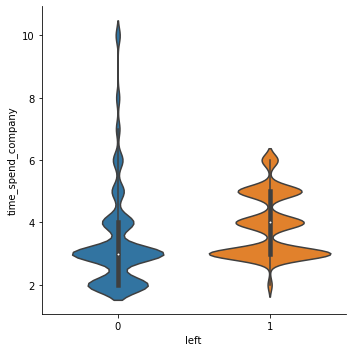

In [132]:
sns.factorplot(x='left', y='time_spend_company', data=data, kind='violin')

#### Inference: People who tend to churn spend less time in company

<AxesSubplot:ylabel='left'>

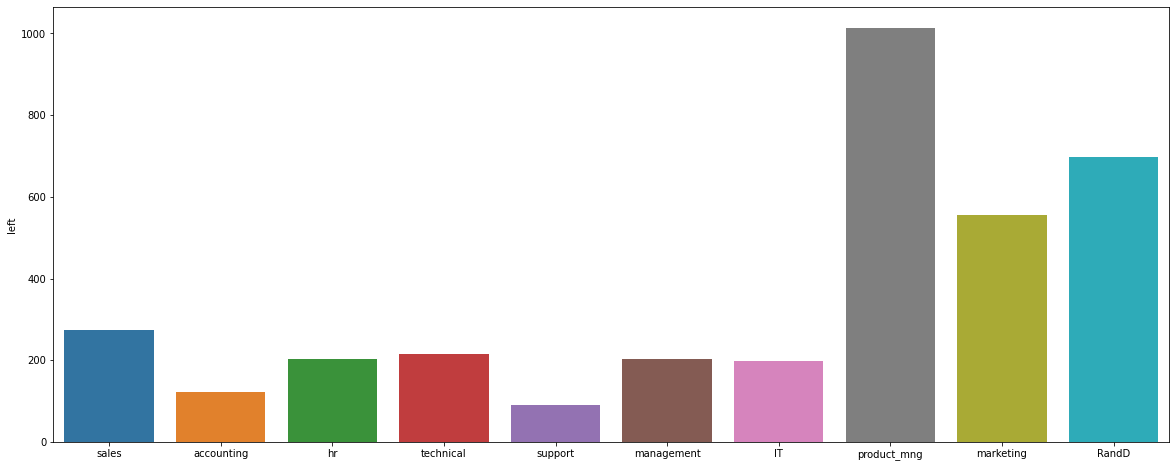

In [124]:
## Department Wise Churn
plt.figure(figsize=(20,8))
sns.barplot(x=data['department'].unique(), y=data.groupby(by='department')['left'].sum())

#### Inference: Employees who're product managers, in marketing, RandD departments tend to churn more

<AxesSubplot:ylabel='left'>

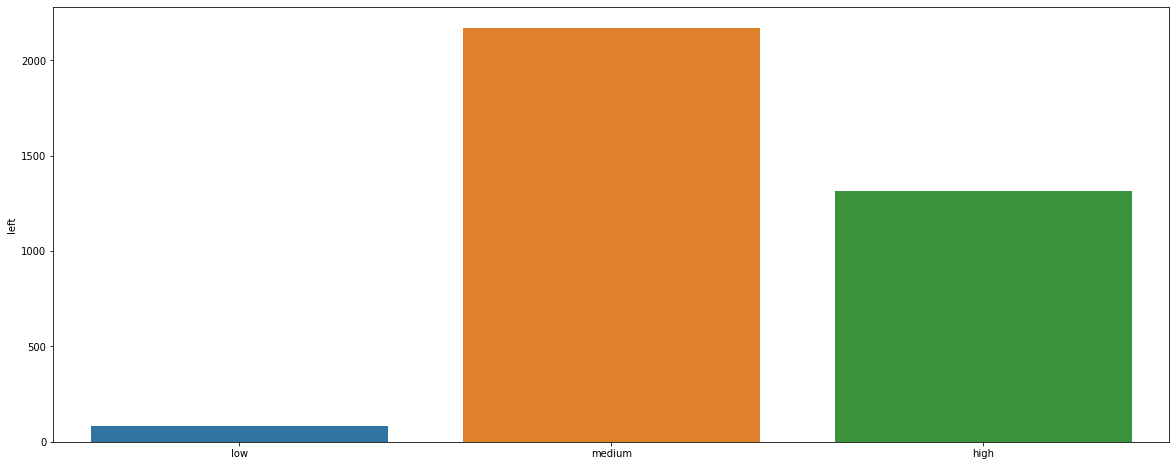

In [126]:
## Salary Wise Churn
plt.figure(figsize=(20,8))
sns.barplot(x=data['salary'].unique(), y=data.groupby(by='salary')['left'].sum())

#### Inference: This is counter intuitive, low salary people are less likely to churn, so salary here is not playing a major role

<AxesSubplot:ylabel='left'>

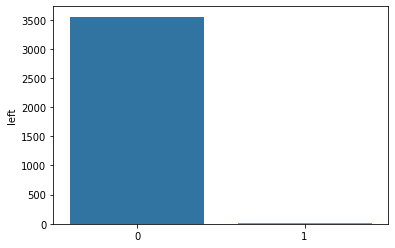

In [128]:
sns.barplot(x=data['promotion_last_5years'].unique(), y=data.groupby(by='promotion_last_5years')['left'].sum())

In [129]:
data['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

#### Inference: Although we can see that people who were promoted in last 5 years are less likely to churn but the people who got promoted were quite less, so nothing can be said for sure

## Handling categorical columns - One Hot Encoding

In [26]:
data = pd.get_dummies(data, drop_first=True)

In [27]:
data = data.drop(columns='employee_id')

In [28]:
data.columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [29]:
data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [30]:
X = data.drop(columns='left')
Y = data['left']

## Train Test Splitting

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [32]:
X.columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

## Scaling

In [33]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [34]:
X_train_scaled.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
count,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000
mean,0.360911,0.489308,0.187935,0.142680,0.020478,0.574509,0.556652,0.052672,0.052195,0.048957,0.042861,0.057720,0.059434,0.275836,0.148871,0.182113,0.485475,0.430803
std,0.247240,0.233252,0.184597,0.349763,0.141636,0.272864,0.267941,0.223388,0.222432,0.215789,0.202554,0.233224,0.236447,0.446956,0.355979,0.385956,0.499813,0.495212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.280374,0.125000,0.000000,0.000000,0.384615,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.481308,0.125000,0.000000,0.000000,0.604396,0.562500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.696262,0.250000,0.000000,0.000000,0.802198,0.796875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
X_test_scaled.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.359911,0.494579,0.185750,0.149111,0.023111,0.574608,0.555961,0.052000,0.048667,0.050000,0.040000,0.056000,0.061778,0.276444,0.148000,0.179556,0.493111,0.427333
std,0.244853,0.233660,0.177582,0.356238,0.150273,0.273566,0.265368,0.222052,0.215194,0.217969,0.195981,0.229947,0.240778,0.447289,0.355139,0.383859,0.500008,0.494746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.285047,0.125000,0.000000,0.000000,0.384615,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.495327,0.125000,0.000000,0.000000,0.604396,0.562500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.700935,0.250000,0.000000,0.000000,0.793956,0.796875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Training & Evaluation

# Logistic Regression

In [36]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

In [38]:
print('train accuracy: ', accuracy_score(y_train, y_train_pred))
print('test accuracy: ', accuracy_score(y_test, y_test_pred))

train accuracy:  0.7915991999238022
test accuracy:  0.7917777777777778


In [39]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3447
           1       0.59      0.36      0.44      1053

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



## Hyperparameter tuning yo improve the recall

In [40]:
lr = LogisticRegression(class_weight={0:1,1:3})
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score, classification_report

In [42]:
print('train accuracy: ', accuracy_score(y_train, y_train_pred))
print('test accuracy: ', accuracy_score(y_test, y_test_pred))

train accuracy:  0.7658824649966663
test accuracy:  0.7595555555555555


In [43]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      3447
           1       0.49      0.79      0.61      1053

    accuracy                           0.76      4500
   macro avg       0.71      0.77      0.72      4500
weighted avg       0.82      0.76      0.78      4500



## Now, we're getting better recall and f1-score

# Random Forest

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

In [45]:
print('train accuracy: ', accuracy_score(y_train, y_train_pred))
print('test accuracy: ', accuracy_score(y_test, y_test_pred))

train accuracy:  1.0
test accuracy:  0.9913333333333333


In [46]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3447
           1       1.00      0.97      0.98      1053

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



## With Random Forest, recall and f1-score are excellent

In [50]:
len(X_train.columns)

18

# Deeplearning - Tensorflow Keras Model

In [49]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
model = Sequential()
model.add(Dense(18, input_dim = 18, activation = 'relu', kernel_initializer='uniform'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer='uniform'))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 19        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train, y_train, batch_size=10, epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
1050/1050 [==============================] - 4s 2ms/step - loss: 0.5618 - recall: 0.0000e+00 - val_loss: 0.5424 - val_recall: 0.0000e+00
Epoch 2/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5248 - recall: 0.0012 - val_loss: 0.5035 - val_recall: 0.0000e+00
Epoch 3/10
1050/1050 [==============================] - 2s 1ms/step - loss: 0.4731 - recall: 0.0759 - val_loss: 0.4512 - val_recall: 0.0247
Epoch 4/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4327 - recall: 0.2196 - val_loss: 0.4026 - val_recall: 0.1785
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3934 - recall: 0.3471 - val_loss: 0.3681 - val_recall: 0.4122
Epoch 6/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3631 - recall: 0.4643 - val_loss: 0.3747 - val_recall: 0.8272
Epoch 7/10
1050/1050 [==============================] - 2s 1ms/step - loss: 0.3390 - recall: 0.5755 - val_loss: 0.3331 - val_recall: 0.7949
Epoch 8/

### We can further increase the complexity of NN for better performance

RANDOM FOREST IS THE WINNER FOR NOW

## Feature Importance

In [74]:
imp_df = pd.DataFrame({'Features':X.columns,'Importance':rf.feature_importances_})

In [95]:
k=imp_df.sort_values(by='Importance',ascending=False)

In [96]:
k

,Features,Importance
5,satisfaction_level,0.308873
2,time_spend_company,0.183622
0,number_project,0.177109
1,average_montly_hours,0.161470
6,last_evaluation,0.123586
3,Work_accident,0.010546
16,salary_low,0.008281
17,salary_medium,0.004082
15,department_technical,0.003592
13,department_sales,0.003487


<AxesSubplot:xlabel='Features', ylabel='Importance'>

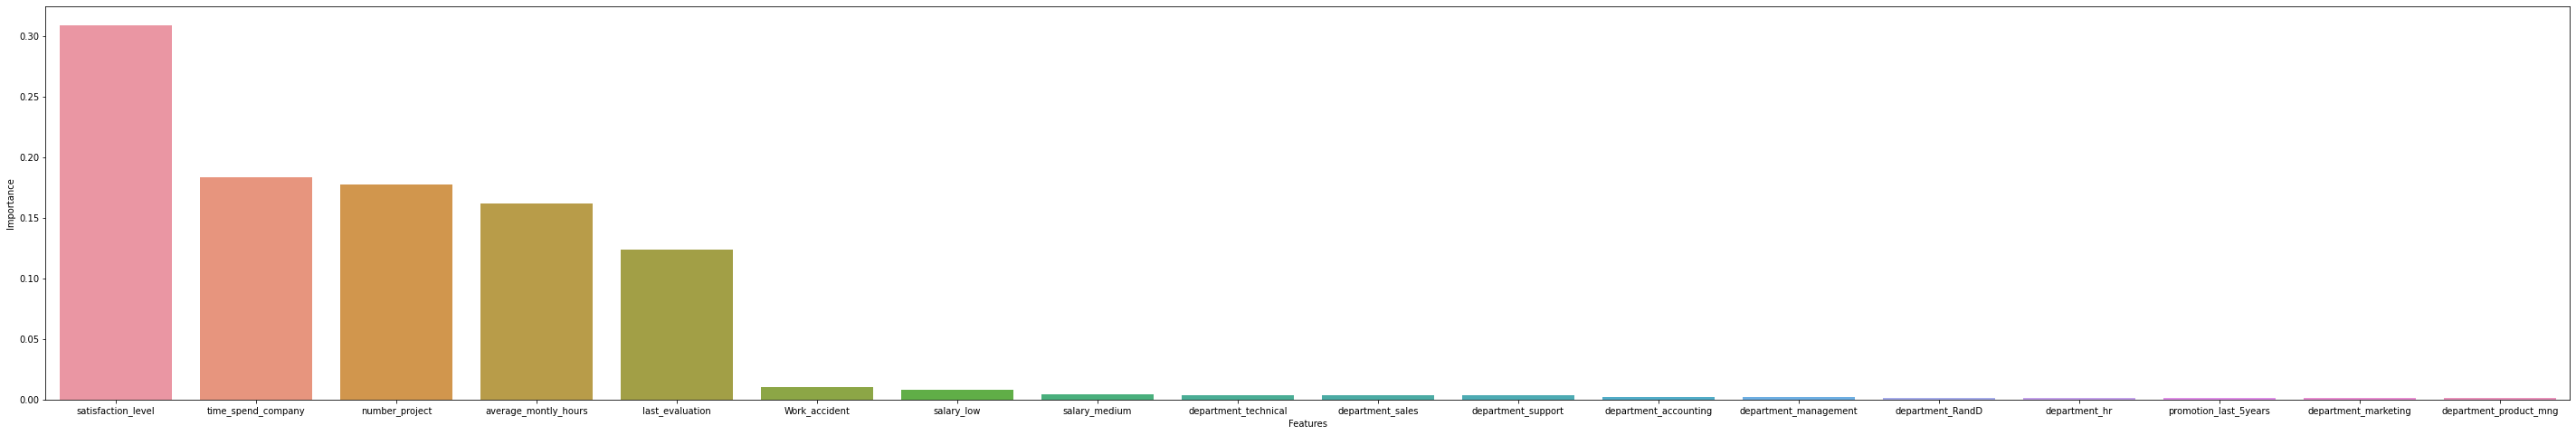

In [97]:
plt.figure(figsize=(50,8))
sns.barplot(x=k['Features'], y=k['Importance'])